In [1]:
import numpy as np
import matplotlib.pyplot as plt

#General Parameters in SI

G=6.6743e-11 #m^3 kg^-1 s^-2
c=3e8 #m/s
h_t=1.054571817e-34 #kg*m^2*s^-2
m_e=9.1093837015e-31 #kg
m_n=1.674927351e-27 #kg
m_sun=1.98855e30 #kg


In [2]:
#Define the system of dimensionless differential eqns 
def white_dwarf(r, y, w ,z): 
    p ,m  = y 
    if p <= 0: 
        return np.array([0, 0])
    dpdr = -m/(r**2)*(p/w)**z
    dmdr = (r**2)*(p/w)**z
    return np.array([dpdr, dmdr])


In [3]:
#Define RK4 method
def rk4(f, y0, r0, rf, dr, w, z):
    r_values = np.arange(r0, rf, dr)
    y_values = np.zeros((len(r_values), len(y0)))
    y_values[0] = y0
    
    for i in range(1, len(r_values)):
        r = r_values[i - 1]
        y = y_values[i - 1]
        k1 = dr * f(r, y, w, z)
        k2 = dr * f(r + dr/2, y + k1/2, w, z)
        k3 = dr * f(r + dr/2, y + k2/2, w, z)
        k4 = dr * f(r + dr, y + k3, w, z)
        
        y_values[i] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return r_values, y_values


In [4]:
#Parameters for EoS

#relativistic constant in the eos p=Kr*e**(4/3)
Kr = h_t*c/(12*np.pi**2)*(3*np.pi**2*((2*m_n*c**2)**(-1)))**(4/3)

#pressure in the centre of the white dwarf
p_c=5.62e24 

#matter density in the centre of the white dwarf
ro_c=(p_c/Kr)**(3/4)*c**(-2) 

#dimensionless param for dimensionless EoS
w = Kr*c**(2/3)*ro_c**(1/3)

#inverse of gamma
z= 3/4

#initial values for the dimensionless system of differential eqns 
p0=p_c/ro_c*c**(-2) 
m0 = 0.0      
y0 = np.array([p0, m0])
r0, rf, dr = 1e-6, 0.25, 0.0001  

In [5]:
# Solve using RK4
r_values, y_values = rk4(white_dwarf, y0, r0, rf, dr, w, z)


In [6]:
#Back to dimensionful quantities

m_values= y_values[:, 1]*4*np.pi*ro_c/(ro_c*4*np.pi*G)**(3/2)*c**3/m_sun
p_values= y_values[:, 0]*ro_c*c**2
r_values1=r_values/(ro_c*4*np.pi*G)**(1/2)*c*10**(-3)



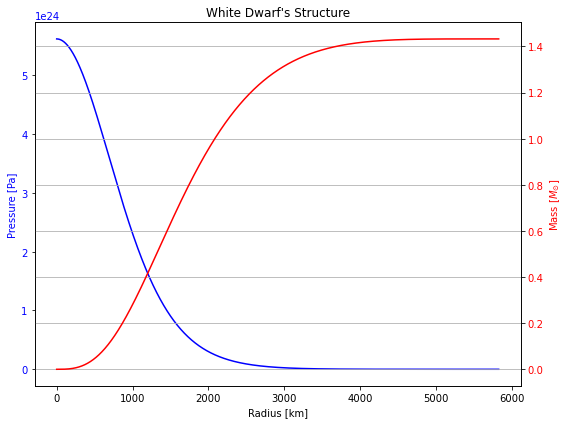

In [7]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(r_values1,p_values , 'b-', label="Pressure [Pa]")
ax1.set_xlabel("Radius [km]")
ax1.set_ylabel("Pressure [Pa]", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()  
ax2.plot(r_values1, m_values, 'r-', label="Mass [$M_{\odot}$]")
ax2.set_ylabel("Mass [$M_{\odot}$]", color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title("White Dwarf's Structure")
fig.tight_layout()
plt.grid()
plt.show()

In [8]:
#Find mass and radius of the White Dwarf (Km and M_sun)
for i in range(len(p_values)):
    if p_values[i] <= 0:
        r_stop = r_values1[i]  # White Dwarf's radius
        M_star = m_values[i]  # White Dwarf's mass
        break  

print(r_stop)
print(M_star)

5711.1504325725255
1.4327703586476153
